In [14]:
#PROBLEM 1
# This code loads a pretrained resnet50 model and uses it to classify certain images that are in the
# classes of the imagenet database. The true labels are attatched to the images and later compared
# with the prediction labels to generate the confusion matrix, accuracy, f1 score, precision, and recall

import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import os
from PIL import Image

#defining all the labels here
img_dir = "images/"
img_labels = {
    'orca1.jpg': 148,
    'orca2.jpg': 148,
    'cat1.jpg': 281,
    'cat2.jpg': 281,
    'laptop1.jpg': 620,
    'laptop2.jpg': 620,
    'clock1.jpg': 892,
    'clock2.jpg': 892,
    'pot1.jpg': 738,
    'pot2.jpg': 738,

}

#resizing images to match imagenet
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#initializing data loader
img_files = list(img_labels.keys())
labels = list(img_labels.values())

#pretrained resnet50 model
model = resnet50(weights='DEFAULT')  
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

y_true = []
y_pred = []

with torch.no_grad():
    for img_file, label in zip(img_files, labels):
        img_path = os.path.join(img_dir, img_file)
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).to(device)  
        
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        
        #the true label 
        y_true.append(label)  
        print(y_pred)

        #prediction label
        y_pred.append(preds.item()) 

#calculating and reporting the desired metrics
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
f_score = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)  
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"F-score: {f_score:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



[]
[148]
[148, 148]
[148, 148, 281]
[148, 148, 281, 281]
[148, 148, 281, 281, 681]
[148, 148, 281, 281, 681, 620]
[148, 148, 281, 281, 681, 620, 892]
[148, 148, 281, 281, 681, 620, 892, 892]
[148, 148, 281, 281, 681, 620, 892, 892, 738]
Confusion Matrix:
 [[2 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]
Accuracy: 0.90
F-score: 0.93
Precision: 1.00
Recall: 0.90


Every image has been identified correctly except for 1 of the laptop images. When looking at all the prediction labels, 
we see that one of the laptop pictures has been identified as a notebook computer which is a reasonable mistake.
The presence of the notebook computer introduces an extra row/column to the confusion matrix. 

PROBLEM 1 

ResNet is short for residual network and is a deep neural network architecture. It is very popular in image recognition tasks. 
What makes ResNet special compared to other similar networks is its  learning approach which introduces shortcut 
connections that allow information to bypass some layers. This design helps the network handle very deep architectures without
the vanishing gradient problem which in turn makes it easier to train complex and multi-layered models. In this code, 
ResNet-50 is used, which is a 50 layer version of the network pretrained on ImageNet. Using this pretrained ResNet-50, the
model can easily recognize and classify images. Here, the network takes each transformed image as input and outputs 
predictions for the label, which is then compared against true labels to calculate the following metrics: accuracy, precision,
and F1 score. We can see that based on the results above, the classification was very accurate and successful.

Using CPU
Starting training...
Epoch [1/5]
  Batch [100/938], Loss: 0.6820
  Batch [200/938], Loss: 0.4718
  Batch [300/938], Loss: 0.2691
  Batch [400/938], Loss: 0.3525
  Batch [500/938], Loss: 0.1517
  Batch [600/938], Loss: 0.2384
  Batch [700/938], Loss: 0.4739
  Batch [800/938], Loss: 0.1211
  Batch [900/938], Loss: 0.2423
Epoch [1/5], Average Loss: 0.3921
Epoch [2/5]
  Batch [100/938], Loss: 0.0924
  Batch [200/938], Loss: 0.3342
  Batch [300/938], Loss: 0.3037
  Batch [400/938], Loss: 0.3535
  Batch [500/938], Loss: 0.3484
  Batch [600/938], Loss: 0.1755
  Batch [700/938], Loss: 0.1248
  Batch [800/938], Loss: 0.2489
  Batch [900/938], Loss: 0.3470
Epoch [2/5], Average Loss: 0.2159
Epoch [3/5]
  Batch [100/938], Loss: 0.1157
  Batch [200/938], Loss: 0.1875
  Batch [300/938], Loss: 0.1939
  Batch [400/938], Loss: 0.1843
  Batch [500/938], Loss: 0.1874
  Batch [600/938], Loss: 0.2208
  Batch [700/938], Loss: 0.1469
  Batch [800/938], Loss: 0.2329
  Batch [900/938], Loss: 0.0998
E

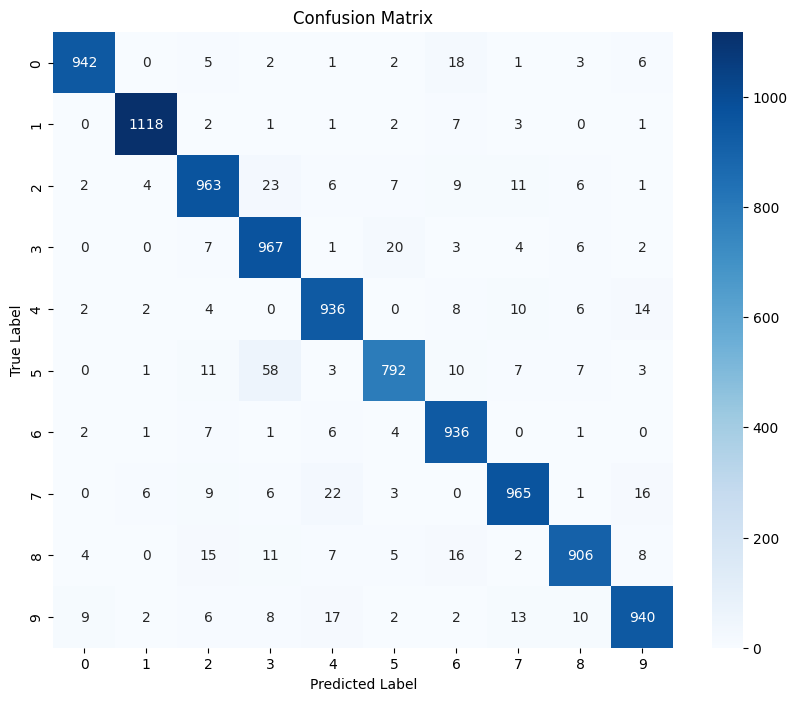

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.93      0.93      1032
           3       0.90      0.96      0.93      1010
           4       0.94      0.95      0.94       982
           5       0.95      0.89      0.92       892
           6       0.93      0.98      0.95       958
           7       0.95      0.94      0.94      1028
           8       0.96      0.93      0.94       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [ ]:
#PROBLEM 2
# This code loads the mnist database and resizes it to be closer in size to 
# what resnet typically likes. Resnet18 is then fine tuned to classify mnist.
# Then it is used to classify the test set and the classification report
# is outputted.

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.models import resnet18, ResNet18_Weights
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Set device : my cuda isnt working :( 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device.type == 'cuda':
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    print("Using CPU")

#load / process mnist 
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  
    transforms.Resize((128, 128)),  
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

#load and modify ResNet18
model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 10)  
model = model.to(device)

for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True  

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)  

#train model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    print("Starting training...")
    model.train()
    for epoch in range(num_epochs):
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if (i+1) % 100 == 0:  
                print(f"  Batch [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")
        print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {running_loss / len(train_loader):.4f}")

#test it
def test_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

#training and testing
train_model(model, train_loader, criterion, optimizer, num_epochs=5)
all_labels, all_preds = test_model(model, test_loader)

#metrics
conf_matrix = confusion_matrix(all_labels, all_preds)
report = classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)])

#print/plot
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", report)


PROBLEM 2

Method:

This code loads the mnist database and resizes it to be closer in size to 
what resnet typically likes. Resnet18 is then fine tuned to classify mnist.
Then it is used to classify the test set and the classification report
is outputted.

Results:

Based on the confusion matrix, the model did a pretty good job at identifying all the 
numbers. However, it did have more difficulty identifying the number 5 in comparison to
the others as the recall and f1 score are lower. That being said, generally high precision,
recall, and f1 score among all the numbers indicate that the model is working very well.



In [ ]:
torch.save(model.state_dict(), 'resnet18_mnist.pth') #saving so i dont have to train again

In [ ]:
#Loading dataset for problem 3

import kagglehub

path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

c:\Users\nihal\OneDrive\Desktop\.vscode\CompVisionProjectEnv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Resuming download from 255852544 bytes (570127034 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/shaunthesheep/microsoft-catsvsdogs-dataset?dataset_version_number=1 (255852544/825979578) bytes left.


100%|██████████| 788M/788M [01:48<00:00, 5.27MB/s]

Extracting files...


Path to dataset files: C:\Users\nihal\.cache\kagglehub\datasets\shaunthesheep\microsoft-catsvsdogs-dataset\versions\1


In [9]:
#PROBLEM 3
# This code first cleans/transforms the dataset from Kaggle by resizing them
# and removing corrupt images. Then it splits the dataset into a training
# set and a testing set. A pretrained Resnet18 is then loaded and fine tuned
# using the kaggle cats vs dogs dataset. The model is then evaluated using the
# test set and the confusion matrix, accuracy, precision, recall, and f1 score
# are reported.

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, models, transforms
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from PIL import UnidentifiedImageError

#device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device.type == 'cuda':
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    print("Using CPU")

#data transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

#handling corrupt images within dataset
class SafeImageFolder(datasets.ImageFolder):
    def __getitem__(self, index):
        try:
            return super(SafeImageFolder, self).__getitem__(index)
        except (UnidentifiedImageError, IOError) as e:
            print(f"Warning: Failed to load image at index {index}: {e}")
            return None

#loading dataset
data_dir = 'C:/Users/nihal/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages'
full_dataset = SafeImageFolder(root=data_dir, transform=data_transforms['train'])

#filter data
valid_data = [data for data in full_dataset if data is not None]

#splitting dataset into training and validation/test
train_size = int(0.8 * len(valid_data))
val_size = len(valid_data) - train_size
train_dataset, val_dataset = random_split(valid_data, [train_size, val_size])

#load with specified batch size
train_loader = DataLoader([(data[0], data[1]) for data in train_dataset], batch_size=16, shuffle=True)
val_loader = DataLoader([(data[0], data[1]) for data in val_dataset], batch_size=16, shuffle=False)

#loading Resnet18 and fine tuning
resnet18 = models.resnet18(pretrained=True)
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 2)
resnet18 = resnet18.to(device)

#train model function
def train_model(model, dataloaders, criterion, optimizer, num_epochs=5, accumulation_steps=2):
    torch.cuda.empty_cache() 
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0

            for i, (inputs, labels) in enumerate(dataloaders[phase]):
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()  

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    loss = loss / accumulation_steps
                    if phase == 'train':
                        loss.backward()
                        
                        if (i + 1) % accumulation_steps == 0:
                            optimizer.step()
                            optimizer.zero_grad()
                
                running_loss += loss.item() * inputs.size(0) * accumulation_steps  
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
    return model

#criterion and optimizer for ResNet18
criterion = nn.CrossEntropyLoss()
optimizer_resnet = optim.Adam(resnet18.parameters(), lr=0.001)
print("\nTraining ResNet18:")
resnet18 = train_model(resnet18, {'train': train_loader, 'val': val_loader}, criterion, optimizer_resnet, num_epochs=5)

def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    #metrics
    conf_matrix = confusion_matrix(all_labels, all_preds)
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return conf_matrix, accuracy, precision, recall, f1

#evaluating
print("\nEvaluating ResNet18:")
evaluate_model(resnet18, val_loader)


Using GPU: NVIDIA GeForce GTX 1660 Ti


c:\Users\nihal\OneDrive\Desktop\.vscode\CompVisionProjectEnv\Lib\site-packages\PIL\TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))
c:\Users\nihal\OneDrive\Desktop\.vscode\CompVisionProjectEnv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\nihal\OneDrive\Desktop\.vscode\CompVisionProjectEnv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Training ResNet18:
Epoch 1/5
----------
Train Loss: 0.2656 Acc: 0.8915
Val Loss: 0.2204 Acc: 0.9068
Epoch 2/5
----------
Train Loss: 0.1956 Acc: 0.9197
Val Loss: 0.1697 Acc: 0.9292
Epoch 3/5
----------
Train Loss: 0.1590 Acc: 0.9385
Val Loss: 0.1441 Acc: 0.9426
Epoch 4/5
----------
Train Loss: 0.1410 Acc: 0.9442
Val Loss: 0.1142 Acc: 0.9550
Epoch 5/5
----------
Train Loss: 0.1181 Acc: 0.9527
Val Loss: 0.1119 Acc: 0.9564

Evaluating ResNet18:
Confusion Matrix:
[[2419   93]
 [ 125 2363]]
Accuracy: 0.9564
Precision: 0.9621
Recall: 0.9498
F1 Score: 0.9559


(array([[2419,   93],
        [ 125, 2363]]),
 0.9564,
 np.float64(0.9621335504885994),
 np.float64(0.9497588424437299),
 np.float64(0.955906148867314))

In [ ]:
#PROBLEM 3
#Do the same as before but now for a different dataset: Efficientnet.

#loading/finetuning efficientnet
efficientnet = models.efficientnet_b0(pretrained=True)
efficientnet.classifier[1] = nn.Linear(efficientnet.classifier[1].in_features, 2)
efficientnet = efficientnet.to(device)

#criterion and optimizer for EfficientNet
criterion = nn.CrossEntropyLoss()
optimizer_efficientnet = optim.SGD(efficientnet.parameters(), lr=0.001, momentum=0.9)

#training the EfficientNet model
print("\nTraining EfficientNet:")
efficientnet = train_model(efficientnet, {'train': train_loader, 'val': val_loader}, criterion, optimizer_efficientnet, num_epochs=5)

#evaluating
print("\nEvaluating EfficientNet:")
evaluate_model(efficientnet, val_loader)


Using GPU: NVIDIA GeForce GTX 1660 Ti


c:\Users\nihal\OneDrive\Desktop\.vscode\CompVisionProjectEnv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\nihal/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:04<00:00, 5.26MB/s]



Training EfficientNet:
Epoch 1/5
----------
Train Loss: 0.2406 Acc: 0.9204
Val Loss: 0.0901 Acc: 0.9732
Epoch 2/5
----------
Train Loss: 0.1120 Acc: 0.9593
Val Loss: 0.0635 Acc: 0.9814
Epoch 3/5
----------
Train Loss: 0.0893 Acc: 0.9661
Val Loss: 0.0445 Acc: 0.9860
Epoch 4/5
----------
Train Loss: 0.0844 Acc: 0.9673
Val Loss: 0.0389 Acc: 0.9870
Epoch 5/5
----------
Train Loss: 0.0671 Acc: 0.9750
Val Loss: 0.0318 Acc: 0.9904

Evaluating EfficientNet:
Confusion Matrix:
[[2436   21]
 [  27 2516]]
Accuracy: 0.9904
Precision: 0.9917
Recall: 0.9894
F1 Score: 0.9906


(array([[2436,   21],
        [  27, 2516]]),
 0.9904,
 np.float64(0.991722506897911),
 np.float64(0.9893826189539914),
 np.float64(0.9905511811023622))

PROBLEM 3

Method:

This code first cleans/transforms the dataset from Kaggle by resizing them
and removing corrupt images. Then it splits the dataset into a training
set and a testing set. A pretrained Resnet18 is then loaded and fine tuned
using the kaggle cats vs dogs dataset. The model is then evaluated using the
test set and the confusion matrix, accuracy, precision, recall, and f1 score
are reported.

Results:

ResNet18:
    Confusion Matrix:
    [[2419,   93],
    [ 125, 2363]]

    Accuracy: 0.9564
    Precision: 0.9621
    Recall: 0.9498
    F1 Score: 0.9559

EfficientNet:
    Confusion Matrix:
    [[2436,   21],
    [  27, 2516]]

    Accuracy: 0.9904
    Precision: 0.9917
    Recall: 0.9894
    F1 Score: 0.9906

Based on the results above, two things are evident. One, both models were able
to learn to classify between dogs and cats. And two, Efficientnet did a much better
job at the task that ResNet18, beating it in all metrics (Accuracy, Precision, recall, and f1).
A reason for EfficientNet outperfroming ResNet18 here could be the compund scaling 
feature it has in which the network width , depth, and resolution are scaled in a balanced way
in order to ensure that the network remains efficient and does not overfit or underfit. 


In [34]:
#EXTRA CREDIT
# Applyign FGSM attack to make images unrecognizable by model

import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
import os
from PIL import Image
import numpy as np

#Directory paths
input_dir = "C:/Users/nihal/OneDrive/Desktop/.vscode/CompVisionProjectEnv/CompVisionProj1/Images"
output_dir = "C:/Users/nihal/OneDrive/Desktop/.vscode/CompVisionProjectEnv/CompVisionProj1/imageswithnoise"

os.makedirs(output_dir, exist_ok=True)

#Parameters for FGSM attack
epsilon = 0.0001  

#Image preprocessing
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#Function to apply FGSM attack to a single image
def fgsm_attack(image, epsilon, data_grad):
    
    perturbed_image = image + epsilon * data_grad.sign()
    perturbed_image = torch.clamp(perturbed_image, 0, 1)  
    return perturbed_image

#Process each image in the input directory
for img_file in os.listdir(input_dir):
    if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(input_dir, img_file)
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).to(device)
        image.requires_grad = True

        output = model(image)
        _, pred_label = torch.max(output, 1)

        loss = torch.nn.functional.nll_loss(output, pred_label)
        
        model.zero_grad()
        
        loss.backward()
        data_grad = image.grad.data

        #Apply FGSM attack
        perturbed_image = fgsm_attack(image, epsilon, data_grad)

        #converting to be saved
        perturbed_image_np = perturbed_image.squeeze().detach().cpu().numpy()
        perturbed_image_np = np.transpose(perturbed_image_np, (1, 2, 0)) 
        perturbed_image_np = (perturbed_image_np * 255).astype(np.uint8)  
        
        #reversing normalization
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        perturbed_image_np = (perturbed_image_np * std + mean) * 255
        perturbed_image_np = np.clip(perturbed_image_np, 0, 255).astype(np.uint8)

        # Save obfuscated image
        perturbed_image_pil = Image.fromarray(perturbed_image_np)
        output_path = os.path.join(output_dir, img_file)
        perturbed_image_pil.save(output_path)
        print(f"Saved image: {output_path}")

print("Done.")


Saved image: C:/Users/nihal/OneDrive/Desktop/.vscode/CompVisionProjectEnv/CompVisionProj1/imageswithnoise\cat1.jpg
Saved image: C:/Users/nihal/OneDrive/Desktop/.vscode/CompVisionProjectEnv/CompVisionProj1/imageswithnoise\cat2.jpg
Saved image: C:/Users/nihal/OneDrive/Desktop/.vscode/CompVisionProjectEnv/CompVisionProj1/imageswithnoise\clock1.jpg
Saved image: C:/Users/nihal/OneDrive/Desktop/.vscode/CompVisionProjectEnv/CompVisionProj1/imageswithnoise\clock2.jpg
Saved image: C:/Users/nihal/OneDrive/Desktop/.vscode/CompVisionProjectEnv/CompVisionProj1/imageswithnoise\laptop1.jpg
Saved image: C:/Users/nihal/OneDrive/Desktop/.vscode/CompVisionProjectEnv/CompVisionProj1/imageswithnoise\laptop2.jpg
Saved image: C:/Users/nihal/OneDrive/Desktop/.vscode/CompVisionProjectEnv/CompVisionProj1/imageswithnoise\orca1.jpg
Saved image: C:/Users/nihal/OneDrive/Desktop/.vscode/CompVisionProjectEnv/CompVisionProj1/imageswithnoise\orca2.jpg
Saved image: C:/Users/nihal/OneDrive/Desktop/.vscode/CompVisionProje

In [35]:
#EXTRA CREDIT
#running with same code from 1 but with obfuscated images

import torch
import torchvision.transforms as transforms
from torchvision.models import resnet50
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import os
from PIL import Image

#defining all the labels here
img_dir = "imageswithnoise/"
img_labels = {
    'orca1.jpg': 148,
    'orca2.jpg': 148,
    'cat1.jpg': 281,
    'cat2.jpg': 281,
    'laptop1.jpg': 620,
    'laptop2.jpg': 620,
    'clock1.jpg': 892,
    'clock2.jpg': 892,
    'pot1.jpg': 738,
    'pot2.jpg': 738,

}

#resizing images to match imagenet
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#initializing data loader
img_files = list(img_labels.keys())
labels = list(img_labels.values())

#pretrained resnet50 model
model = resnet50(weights='DEFAULT')  
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

y_true = []
y_pred = []

with torch.no_grad():
    for img_file, label in zip(img_files, labels):
        img_path = os.path.join(img_dir, img_file)
        image = Image.open(img_path).convert("RGB")
        image = transform(image).unsqueeze(0).to(device)  
        
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        
        #the true label 
        y_true.append(label)  
        print(y_pred)

        #prediction label
        y_pred.append(preds.item()) 

#calculating and reporting the desired metrics
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
f_score = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)  
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)

print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"F-score: {f_score:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



[]
[148]
[148, 148]
[148, 148, 199]
[148, 148, 199, 917]
[148, 148, 199, 917, 782]
[148, 148, 199, 917, 782, 527]
[148, 148, 199, 917, 782, 527, 633]
[148, 148, 199, 917, 782, 527, 633, 409]
[148, 148, 199, 917, 782, 527, 633, 409, 714]
Confusion Matrix:
 [[2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
Accuracy: 0.20
F-score: 0.20
Precision: 0.20
Recall: 0.20


The attack results in a much lower success rate in the model identifying images.